

# COGS 108 - Final Project Group 26


# Names
Joyaan Bhesania
Garo Adjoian
Navid Nezamabadi
Jonathan Titus
Juan Sandoval

# Group Members IDs
A13494425 A13977568 A14810374 A14352852 A13083678



# Introduction & Background

### Overview

People are aware that factors such as financial difficulty, sex, and age group must affect rates of suicide. With our research question, “Does GDP affect suicide rates across various sexes and age groups from 1985 to 2016?”, we try to see if GDP is the major contributing factor to suicides around the world. If it so happens to be the case that GDP is the major factor in suicides then at least we now know what we should be aiming to improve. If not, then more research will be needed to find the root cause of suicides so that we may lower them and hopefully eradicate any reason for it. 


### Research Question
 How does GDP affect suicide rates across various sexes and age groups from 1985 to 2016?   


### Background and Prior Work
The data that the team intends to use for analysis is an amalgamation of data from four primary datasets. The Human Development Index (HDI) data was pulled from the United Nations Development Program database, while the GDP and GDP per/capita came from the World Bank, and the figures for global suicide rates came from the World Health Organization & “Suicide in the Twenty-First Century” (Szamil, 2017). The four different sources provided data on their respective fields from the mid-1980's until the mid-2010’s. It is worth noting that in their analysis, the World Health Organization & Szamil both based their findings on age-standardized suicide rates done in suicides per/100,000 population to properly assess the global situation. These initial reports showed that men were much more prone to commit suicide than their female counter parts, young people were not particularly at risk to commit suicide when compared to other age groups regardless of country, and that overall global sucide rates were going down. In relating GDP to suicide rates, the group sought reference from prior studies including “Relationship of suicide rates to economic variables in Europe: 2000–2011” (by The British Journal of Psychiatry) and “Worldwide impact of economic cycles on suicide trends over 3 decades: differences according to level of development. A mixed effect model study” (by BMJ Journals). 

In their report, BMJ constasted the PPP (purchasing power parity) adjusted GDP per/capita with the suicide rates of countries grouped by the “Global Burden of Disease Study’s regional classification system”. They reported that in most of Latin America, Southeastern Asia and China/Korea/Japan there was a visible positive correlation between an increase in PPP per capita and suicide rates. Conversely, they reported that in the more developed Western Nations (Western&Central Europe and North America) there appeared to be a negative correlation between an increase in PPP per capita and suicide rates. The report went on to state there was no significant observable correlation between the two variables in sub-Saharan Africa and the Middle East/North Africa. The report stated that fast economic growth unaccompanied by strengthened socioeconomic and state institutions was likely reason for this phenomena in the developing world. Lastly, BMJ’s report acknowledged some of the studies shortcomings, notably not being able to account for microsocioecnomic confounding factors such as: unemployment rate, divorce rate, urban/rural divide, and alcohol consumption rate. 

Contrary to the findings of the BJM, the British Journal of Psychiatry was unable to correlate GDP per capita to suicide rates. They gathered data from 29 European countries consisting of suicide rates in males and females, unemployment rates, GDP per capita, economic growth rate per annum and inflation. They found that for males all of the aforementioned economic factors were correlated with suicide except GDP per capita. The findings were even less significant for females, where it was discovered that only the unemployment rate was correlated with the suicide rate. However, the authors did acknowledge that the study was based on aggregated data from each nation’s respective statistical agencies which would result in asymmetric data from various nations leading to possible “cross-level” and “aggregate bias” in the report’s findings. 

References (include links):

1) https://bmjopen.bmj.com/content/2/3/e000785 

2) https://www.cambridge.org/core/journals/the-british-journal-of-psychiatry/article/relationship-of-suicide-rates-to-economic-variables-in-europe-20002011/BED5FCDDA918CE73A5390249B83F0C57 

### Hypothesis

Hypothesis: There is an negative correlation between GDP and suicide rates across various sexes and age groups from 1985 to 2016. 
We predict that countries with a lower GDP have a higher suicide rate based on the lack of available resources. We assume that this lack of resources is correlated with suicide because of due to worse socioeconomic institutions.





# Dataset(s)
Dataset Name: Suicide Rates Overview 1985 to 2016

Link to the dataset: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

Number of observations: 27820

This data was created through compiling information from four different sources including: the United Nations Development Program (2018) - Human development index (HDI), The World Bank (2018) - World development indicators: GDP (current US$), Suicide in the Twenty-First Century (2017), The World Health Organization (2018) - Suicide prevention. These datasets come together to form a fairly robust dataset with the following markers: country, year, sex, age group, count of suicides, population, suicide rate, country-year composite key, HDI for year, gdp_for_year, gdp_per_capita, generation. Through the information provided in this dataset, we aim to tackle our question and test our hypothesis regarding the leading indicators to a countries suicide rate.

Dataset Name: Human Development Data(1990-2017)

Link to the dataset: http://hdr.undp.org/en/datafbclid=IwAR33t54BUOfkEJvaWqq6aTGV2vnPAWIZk59Hgib2qA0hM58BeamfSO_18q4

Number of observations: 5292

This dataset was created by the United Nations Development program, and it is the most accurate data available regarding the Human Development Indexes of all countries in the world. While there are still holes in the dataset regarding the HDI of certain developing countries, this is not the fault of the dataset itself, but rather the lack of information regarding those countries to conduct an accurate measurmenet.

Creating our own dataset
While our main dataset, Suicide Rates Overview 1985 to 2016, is very robust and has a lot of relevant information, the one area it lacks in is the HDI column. To assist in best answering our question, we have merged a smaller dataset that has many less holes in the data regarding the HDI of the world. We merged the two datasets to fill in the gaps that exist in the first dataset. This allowed to us analyze based on more than just gdp, since HDI includes gdp and more into its analysis.

# Data Analysis

### Data Cleaning & Pre-processing
The datasets were fairly clean to begin with, with the only issues being the lack of HDI information in our main dataset. We determined that the data was clean by seeing how many null values existed and we also looked into whether any values did not match proper formatting. We found that all the data matched and there was nothing to clean, but that we had null values in one column: HDI. 

To remedy this issue we merged in a second dataset that had much more relevant information regarding the HDI. To do this we first had to transform the HDI dataset into a more workable format. Originaly this dataset was formated to have each country take up one row, with all of the year information being represetned via columns. This format was very difficult to merge into our existing dataset, which is why we transformed the dataset to be more row focused. This meant that each country and year had its own row, making the merging process between the two datasets much simpler. The before and after results of the dataset as well as the number of missing entries can be seen below.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from collections import defaultdict
import pygal
from pygal_maps_world.maps import World

#For linear modeling
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# For heat maps
from IPython.core.display import SVG

df_init = pd.read_csv("master.csv")
df_HDI = pd.read_csv("Human development index (HDI).csv", encoding ='latin1')

Having imported the data set, a first look was taken as such:

In [2]:
df_init.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df_HDI.Country = df_HDI.Country.str.lstrip()

Upon this initial glance, it was noted that many of the HDI entries were reported as NaN. A closer look was taken, revealing that many of the HDI entries were infact NaN:

In [4]:
df_HDI.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,0.652,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,0.627,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581


In [5]:
df_HDI.shape

(189, 29)

This was then mitigated by merging the dataset with HDI data from another data set:

In [6]:
df_HDI = pd.melt(df_HDI, id_vars=["Country"], var_name=['Year'],value_name="HDI")
df_HDI = df_HDI.sort_values(["Country", "Year"])
df_HDI = df_HDI.reset_index(drop=True)

In [7]:
df_HDI.head()

,Country,Year,HDI
0,Afghanistan,1990,NaN
1,Afghanistan,1991,NaN
2,Afghanistan,1992,NaN
3,Afghanistan,1993,NaN
4,Afghanistan,1994,NaN


In [8]:
df_HDI.shape

(5292, 3)

In [9]:
sum(df_init['HDI for year'].isna())

19456

In [10]:
for index, row in df_HDI.iterrows():
    df_init.loc[(df_init['country'] == row['Country']) & (df_init['year'] == int(row['Year'])), 'HDI for year'] = row['HDI']

In [11]:
sum(df_init['HDI for year'].isna())

5194

# Data Visualization

The first set of analysis performed was a comparison of suicide rates and sex. To take an initial glance at the matter, a scatter plot of data entry points across all countries, age groups, and years was made for each of the two sexs. The plot clearly visualized that for each 'country, year, and age' pair, the male suicide rate per 100k of population was noticibly higher than the female counter part:

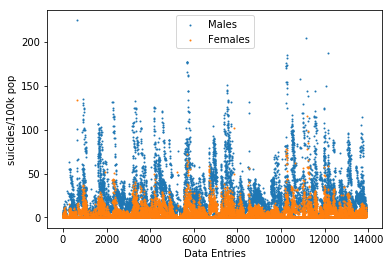

In [12]:
data = df_init

males = data[data['sex'] == 'male']
females = data[data['sex'] != 'male']

men_mean = males['suicides/100k pop'].mean()
men_median = males['suicides/100k pop'].median()
men_max = males['suicides/100k pop'].max()

plt.scatter(range(len(males['suicides/100k pop'])), males['suicides/100k pop'], s = 1,)
plt.scatter(range(len(males['suicides/100k pop'])), females['suicides/100k pop'], s = 1)
plt.xlabel('Data Entries')
plt.ylabel('suicides/100k pop')
plt.legend(('Males', 'Females'))
plt.show()

With promising initial findings, the group proceeded to further investigate this difference. First, the global suicide numbers were plotted year by year using a line graph. Then the total global suicide numbers for males and females for each year were obtained and compared on a plot that tracked their development from 1985 to 2015 (2016 was discarded as its data was generally viewed to be extraneous and inconsistent with the rest of the dataset's). It was shown that a disproportionate amount of the global suicides were coming from the male population:

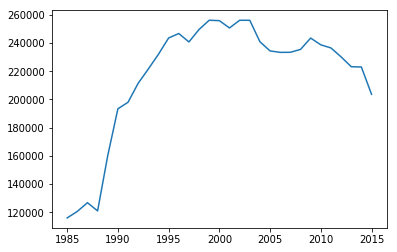

In [13]:
data = data[data['year'] != 2016]
data = data[data['suicides_no'] != 0]

years_dictionary = dict()
for i,j in data.iterrows():
    if j['year'] in years_dictionary:
        years_dictionary[j['year']] += j['suicides_no']
    else:
        years_dictionary[j['year']] = j['suicides_no']
lists = sorted(years_dictionary.items())
years, deaths = zip(*lists)
plt.plot(years, deaths)
plt.show()

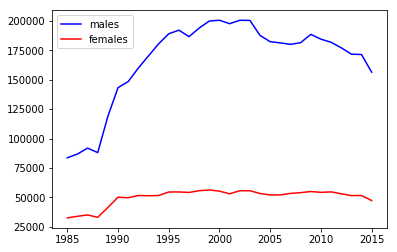

In [14]:
years_male_dictionary = dict()
for i,j in data[data.sex == 'male'].iterrows():
    if j['year'] in years_male_dictionary:
        years_male_dictionary[j['year']] += j['suicides_no']
    else:
        years_male_dictionary[j['year']] = j['suicides_no']
list_male = sorted(years_male_dictionary.items())
years_male, deaths_male = zip(*list_male)

years_female_dictionary = dict()
for i,j in data[data.sex == 'female'].iterrows():
    if j['year'] in years_female_dictionary:
        years_female_dictionary[j['year']] += j['suicides_no']
    else:
        years_female_dictionary[j['year']] = j['suicides_no']
list_female = sorted(years_female_dictionary.items())
years_female, deaths_female = zip(*list_female)

plt.plot(years_male, deaths_male, color = 'b')
plt.plot(years_female, deaths_female, color = 'r')
plt.legend(['males', 'females'])
plt.show()

With this graphical analysis suggesting that a truly exists a noticeable difference between male and female suicide rates, it was opted to substantiate if this difference was truely statistically significant. A two sample T-test was conducted on the data, yielding a mean difference of ~68 more deaths amoungst males per 100k population than their female counterparts. Furthermore, the test outputed an extremely small P-value that was more or less equal to zero, indicating that this difference in the true means (of suicide rates of males and females) was not simply due to randomness. Thus is was concluded that there does exists a statistically significant difference in the mean suicide rate of males and females:

In [15]:
males = data[data.sex == 'male']
females = data[data.sex == 'female']

test_stat, p_value = ttest_ind(males['suicides/100k pop'], females['suicides/100k pop'])
print('The T-Test statistic is: ' + str(test_stat) +
      '\nand the P_value is: ' + str(p_value))

The T-Test statistic is: 68.89214684614922
and the P_value is: 0.0


Next, the group wanted to show if poorer (HDI below 0.65) and richer countries (HDI above 0.85) repond to increases in their repective HDI's in similar ways or not. Two scatter plots were created, one for poorer countries and one for richer countries, with HDI on the X-axis and suicide rate (per 100k of population) on the Y-axis. It was noticed that as HDI increased for poorer nations, their suicide rates also tended to increase. Conversely, it was shown that as the HDI of richer nations increased, their suicide rates began to decrease. The same was done with GDP per capita as well, indicating that suicide rates decreased as a nation became richer:

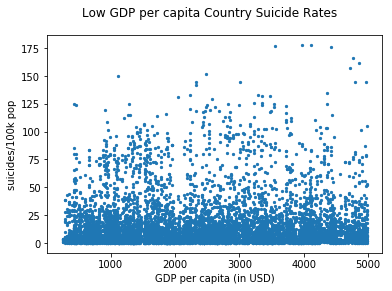

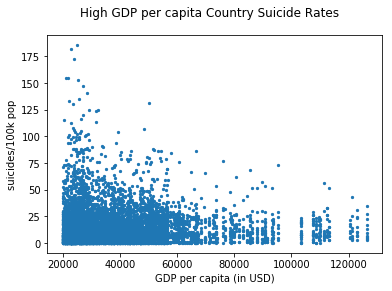

In [16]:
rich_countries = data[data['gdp_per_capita ($)'] > 20000]
poor_countries = data[data['gdp_per_capita ($)'] < 5000]

plt.scatter(poor_countries['gdp_per_capita ($)'],  poor_countries['suicides/100k pop'], s = 5)
plt.suptitle('Low GDP per capita Country Suicide Rates')
plt.ylabel('suicides/100k pop')
plt.xlabel('GDP per capita (in USD)')
plt.show()

plt.scatter(rich_countries['gdp_per_capita ($)'],  rich_countries['suicides/100k pop'], s = 5)
plt.suptitle('High GDP per capita Country Suicide Rates')
plt.ylabel('suicides/100k pop')
plt.xlabel('GDP per capita (in USD)')
plt.show()

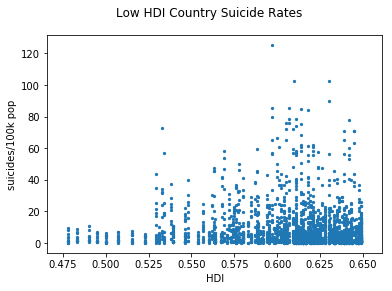

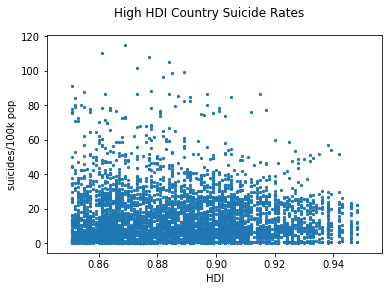

In [17]:
rich_countries = data[data['HDI for year'] > .85]
poor_countries = data[data['HDI for year'] < .65]

plt.scatter(poor_countries['HDI for year'],  poor_countries['suicides/100k pop'], s = 5)
plt.suptitle('Low HDI Country Suicide Rates')
plt.ylabel('suicides/100k pop')
plt.xlabel('HDI')
plt.show()

plt.scatter(rich_countries['HDI for year'],  rich_countries['suicides/100k pop'], s = 5)
plt.suptitle('High HDI Country Suicide Rates')
plt.ylabel('suicides/100k pop')
plt.xlabel('HDI')
plt.show()

## Heatmaps

In [18]:
country_codes = pd.read_csv("country_codes.csv", header=None, names=['Country Code', 'Country'])

In [19]:
def generate_map(year, gender):
    df_temp = data.loc[(data['year'] <= year) & (data['age'] == '25-34 years') & (data['sex'] == gender)]
    heat_map = defaultdict(int)
    for index, rows in df_temp.iterrows():
        if rows['country'] in country_codes.Country.values:
            country_code = country_codes.loc[country_codes['Country'] == rows['country']]['Country Code'].values[0]
            if heat_map[country_code] != 0:
                continue
            else:
                heat_map[country_code] = abs(df_temp.loc[rows['country'] == df_temp['country']]['HDI for year'].corr(df_temp.loc[rows['country'] == df_temp['country']]['suicides/100k pop']))
    return heat_map

This method takes in a gender and a year, which serves as the upper limit for the year we will include in our heat map generation. Once we have this information, we narrow down the individuals to include in our heat map by the age range of 25-34 years, and begin checking the correlations between suicide rates and HDI for each and every country. We use a dictionary to store this information, and eventually build a heatmap as an SVG file.

In [20]:
world_map = World()
heat_map = generate_map(2015, 'male')
world_map.title = "Correlation between HDI and Suicide Rate for Young Adult Males"
world_map.add('1985-2015',heat_map)
world_map.render_to_file('heat_map.svg')

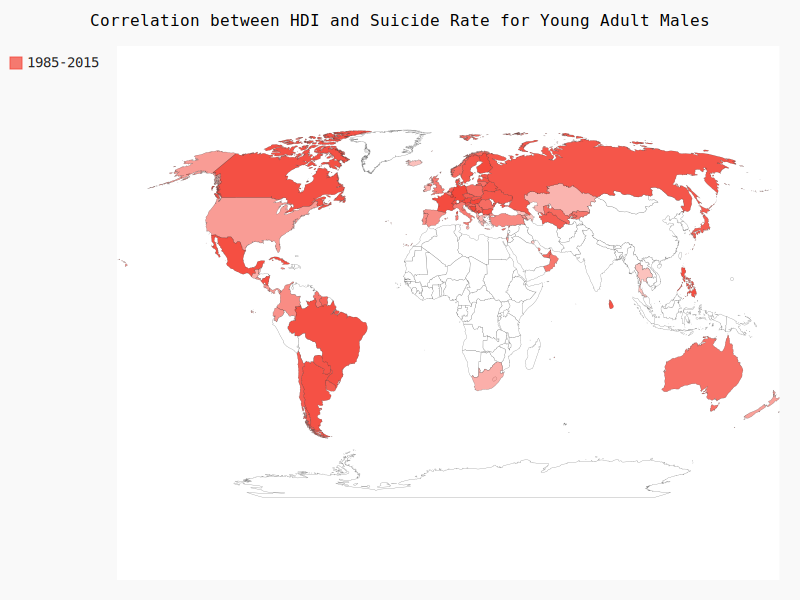

In [21]:
SVG(filename='heat_map.svg')

In [22]:
import warnings
warnings.filterwarnings(action='ignore')

world_map_female = World()
heat_map_female = generate_map(2015, 'female')
world_map_female.title = "Correlation between HDI and Suicide Rate for Young Adult Females"
world_map_female.add('1985-2015',heat_map_female)
world_map_female.render_to_file('heat_map_female.svg')

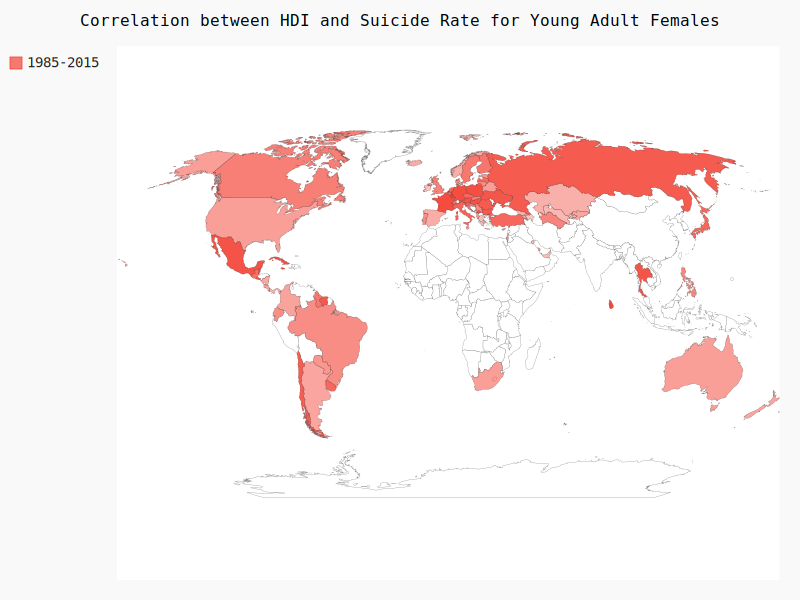

In [23]:
SVG(filename='heat_map_female.svg')

These heat maps represent the correlation between HDI and Suicide Rates accross the world for young adult males and females respectively. With the darker shades of read representing heavy correlations between HDI and suicide rates, either positive or negative, and the ligher shades denoting little correlation. We can see from this heat map where our data falls short, with the majority of the developing world lacking HDI information, which results in no results in these areas. From the areas that do have data; however, we can see that for the majority of first world nations, HDI is a fairly powerful corollary for suicide rates for men, but less so for women.

## Linear Modeling 
Our goal was to see the correlation across genders and across age groups as we created a linear model and analyzed its factors. We first created a linear model based on age, sex, and HDI for the year to find the number of suicides. This showed us something we have already seen earlier: that being male increases your chances of commiting suicide greatly. However, it also showed us that the following age groups had the highest correlation to suicide numbers: 35-54, 55-74, 25-34, respectively. The remaining age groups, 75+ and 5-14, had a negative coefficient. However, when we performed the same linear analysis a second time with the same factors to find suicide rate per 100k populaion instead of suicides numbers, we found quite different results for the 75+ age group. Since the number of people over 75 is low, their suicide rates were not accurately represented with numbers. When taking rates per population into account instead of numbers, they went from haing a negative coefficent to having the highest coefficient across all age groups. This is a more accurate representation, and our final ordering of age groups more correlated with suicide rates is 75+, 55-74, 35-54, 25-34, respectively in order from highest to lowest correlation.  

Another important note about these correlations is that HDI_for_year was the strongest correlation in our first analysis and the third strongest correlation (after being male and 75+) by a very small margin. This indicates HDI has a very strong factor in suicide rates as we have seen in our heatmaps previously. 

In [24]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [25]:
data = data.dropna()
data.columns = data.columns.str.replace('HDI for year','HDI_for_year')
data.columns = data.columns.str.replace('suicides/100k pop','suicides_Per_100kpop')
data.head()
outcome, predictors = patsy.dmatrices('suicides_no ~ age + sex + HDI_for_year', data)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())
outcome, predictors = patsy.dmatrices('suicides_Per_100kpop ~ age + sex + HDI_for_year', data)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            suicides_no   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     189.1
Date:                Wed, 12 Jun 2019   Prob (F-statistic):          2.05e-272
Time:                        23:01:25   Log-Likelihood:            -1.6311e+05
No. Observations:               19601   AIC:                         3.262e+05
Df Residuals:                   19593   BIC:                         3.263e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -667.2097     59

# Privacy/Ethics Considerations

The biggest thing to consider when it comes to ethical considerations is the topic itself in our scenario. Suicide is not an easy topic to talk about, especially not as a form of data collection. This limits how specific our data can get since not all information about a person who has committed suicide will be released for privacy. We will only be collecting data such as country name, year, sex, age, suicide numbers, polualtion, suicides per 100k population, HDI per year, GDP per year, GDP per capita, and generation. We will be unable to obtain and share any data that falls under the Safe Harbor method. Any type of information that falls under the Safe Harbor method is not actually needed to answer our research question unless someone wants to go around and confirm that every person in our data actually exists. Even if we wanted to violate the Safe Harbor rules then this also means that we would be causing people some level of emotional turmoil. 


While it will be interesting to study how GDP and socioeconomic status affect the suicide rates of a country, it is likely to be seen as unethical to ask someone about a suicide of someone that they knew. Not only that, but something else that could factor into the data collection is who exactly we are collecting the data from. We want to avoid misrepresentation. It will be unethical to just collect data from a group that is known to have high suicide rates because this could prevent us from seeing if there is another group that is more in need. 


After determining what topic we wanted to research, we proceeded to use the data science process in order to see just how ethical our data collection is. Based on our question of “Does GDP affect suicide rates across various sexes and age groups from 1985 to 2016?”, we began collecting data related to this. 


Originally we were working with one dataset, and after doing some minor data cleaning, we found that the original dataset didn’t contain enough values for us to analyze. Due to the lack of data, we opted to integrate a second dataset which contained similar data. Ideally, we would not have to have any data cleaning, but due to the fact that we were using two datasets, we needed to at least clean a little to achieve the best possible dataset to analyze. 


As for bias in the data, we attempted to include as little bias as possible, however, because our two datasets were so varied, it may appear that we are analyzing more developed countries. This is the case because, even with two datasets, we had issues collecting data from developing countries.


Overall, we attempted to be as ethical as possible in terms of both data collection, and the cleaning of the data. After searching several sources and compiling data, we believe that this final dataset we complied is as unbiased as we possibly could make it, while not attempting to include any biases whatsoever.


# Conclusion & Discussion

In conclusion, we tried to answer the question, “Does GDP affect suicide rates across various sexes and age groups from 1985 to 2016?” We came in thinking that males were more likely to commit suicide than females. We decided to further analyze this hypothesis upon finding our data and in comparing the suicide rates between males and females, we saw a dramatic gap between the two. With this in mind, we proceeded to analyze our question.
As it turns out, there is a negative correlation between suicide rates and GDP. This is what we thought would happen before we analyzed our data. We proceeded to graph this analysis out by comparing GDP per capita (USD) and Suicide Rates per 100k population. As we can see on said graphs, as the GDP increases, the suicide rates decrease. Even though there still seems to be a large amount of suicides per capita for countries with high GDP, it is drastically less compared to those of a GDP less than $5000.
Other factors that affected our data was the lack of data for several countries. By compiling two dataframes, we prevented a massive amount of Null/NaN data from being considered. It is important to remove this data because if we did not then we would not have had the ability to compare these two factors effectively.

 As expected, the most significant factor tends to be GDP. We were not surprised by this factor since the background research we performed seemed to note that aspect already. It is highly important to acknowledge that correlation does not mean causation. Just because someone meets all of our factors for having a high chance of suiciding does not mean that they actually have a higher chance than someone that does not meet our factors. There could be a factor that we did not take into account which could actually be the main cause for suicides, but without any additional data, we cannot confirm or deny that an outside factor may have affected the data. 
Regardless, with our findings we found that the group most affected by suicide in comparrison to GDP are males rather than females. As unfortunate as this, there is not much we can do to solve this issue other than to question why it is happening, and if the problem runs deeper than just a low GDP.


The most important limitation of this analysis was cause by the nature of the data availiable. Firstly, almost the entirety Sub-Saharan Africa was void of any data, effectively putting close to 1 billion global citizens underrepresented in this paper's findings. Additionally, it was not entirely guaranteed that the data from countries that the group did have access to data from were entirely accurate. Suicide is not an easily discussed matter, and especially so in many more socially conservative nations around the globe. Many cases of suicide go unreported, especially in the global south, which would in turn lead to greatly under-valued suicide rates in many nations across the non-Western world. Another similar consideration would be the likely vast under-representation of rural suicides in many of these countries, leading to a possible over analysis of suicided data from well-connected urban centers. Extrapolating findings based on data that was potentially drawn largely from urban centers in many of the more underdeveloped contries of the world would likely skew the overall analysis of the group. Thus, the lack of data from many underdeveloped nations and the potentially dubious data collected from underdeveloped nations that the group did have access to, would not be truly reflective of real situation in these nations. As such, when comparing data from richer nations in the West (that are most probably more accurately collected by national health agencies) to that from these less developed nations, it may entirely be possible that correlations and trends may appear simply due to the differing quality of data collected from these nations. As such, it must be acknowledged that while the group has found strong evidence to support a relationship between suicide rates and gender or economic factors, the percise nature of those relationships may have been slightly skewed by the nature of the data available. 